# **Import needed libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


# **Load Data**


In [2]:
Train_df = '/kaggle/input/brain-tumor-mri-dataset/Training'
filepaths = []
labels = []
folds = os.listdir(Train_df)
for fold in folds:
    FoldPath = os.path.join(Train_df, fold)
    files = os.listdir(FoldPath)
    for file in tqdm(files):
        filepath = os.path.join(FoldPath,file)
        filepaths.append(filepath)
        labels.append(fold)

100%|██████████| 1321/1321 [00:00<00:00, 348865.10it/s]


In [3]:
print(len(filepaths))
print(len(labels))

5712
5712


In [4]:
print(labels[-1])


glioma


In [5]:
print(np.unique(labels))

['glioma' 'meningioma' 'notumor' 'pituitary']


In [6]:
df_train = pd.DataFrame(
    data = {
        'filepath': filepaths,
        'label': labels
    }
)

In [7]:
df_train.head()

,filepath,label
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary


In [8]:
color = ['#9AA6B2','#BCCCDC','#D9EAFD','#F8FAFC']

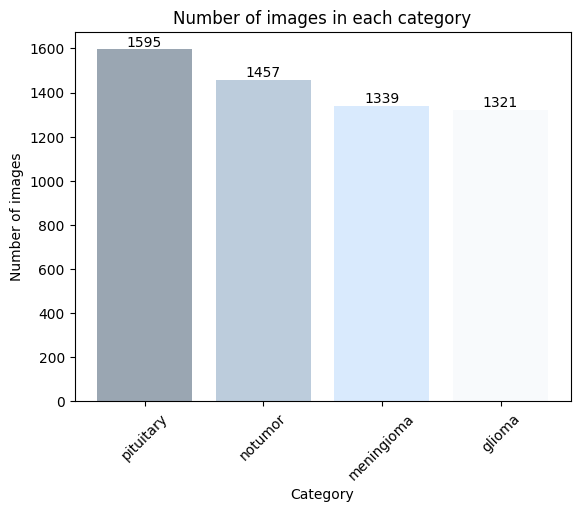

In [9]:
 
fig, ax = plt.subplots()
bars = ax.bar(df_train['label'].unique(), df_train['label'].value_counts(),color=color)
ax.bar_label(bars)
plt.title('Number of images in each category')
plt.xlabel('Category')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

plt.show()


In [10]:
df_train.sample(5)

,filepath,label
3560,/kaggle/input/brain-tumor-mri-dataset/Training...,meningioma
3030,/kaggle/input/brain-tumor-mri-dataset/Training...,notumor
1455,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4708,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
1462,/kaggle/input/brain-tumor-mri-dataset/Training...,notumor


In [11]:
Test_df = '/kaggle/input/brain-tumor-mri-dataset/Testing'

filepaths = []
labels = []
folds = os.listdir(Test_df)
for fold in folds:
    FoldPath = os.path.join(Test_df, fold)
    files = os.listdir(FoldPath)
    for file in tqdm(files):
        filepath = os.path.join(FoldPath,file)
        filepaths.append(filepath)
        labels.append(fold)

100%|██████████| 300/300 [00:00<00:00, 655701.51it/s]


In [12]:
print(len(filepaths))
print(len(labels))


1311
1311


In [13]:
print(np.unique(labels))

['glioma' 'meningioma' 'notumor' 'pituitary']


In [14]:
 df_test = pd.DataFrame(
    data = {
        'filepath': filepaths,
        'label': labels
    }
)

In [15]:
df_test.head()

,filepath,label
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary


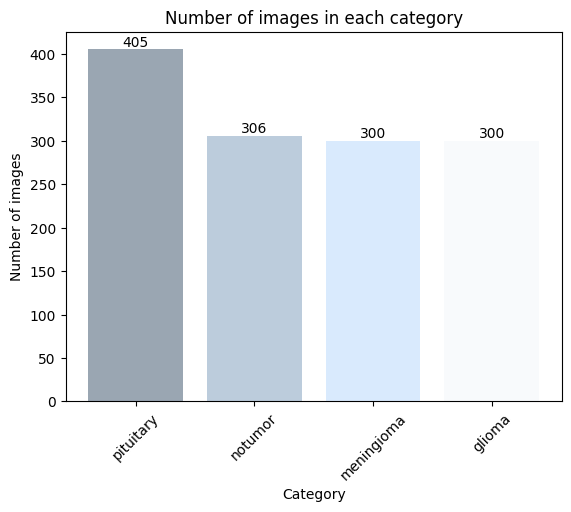

In [16]:

fig, ax = plt.subplots()
bars = ax.bar(df_test['label'].unique(), df_test['label'].value_counts(),color=color)
ax.bar_label(bars)
plt.title('Number of images in each category')
plt.xlabel('Category')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

plt.show()


# **Split data into train, test, valid**

In [17]:
valid_ts, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [18]:
tr_gen = ImageDataGenerator(rescale=1/255)
ts_gen = ImageDataGenerator(rescale=1/255)
batchsize = 32
img_size = (224,224)

In [19]:
gen_train = tr_gen.flow_from_dataframe(df_train, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=True,color_mode='rgb')
gen_valid = ts_gen.flow_from_dataframe(valid_ts, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=True,color_mode='rgb')
gen_test = ts_gen.flow_from_dataframe(df_test, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=False ,color_mode='rgb')

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [20]:
class_dict = gen_train.class_indices


# **Building Deep Learning Model¶**

In [21]:

Model = Sequential([
    Conv2D(64, kernel_size= (3,3), activation='relu', input_shape=(img_size[0],img_size[1],3)),
    Conv2D(64, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, kernel_size= (3,3), activation='relu'),
    Conv2D(128, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(256, kernel_size= (3,3), activation='relu'),
    Conv2D(256, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3), activation='relu'),
    Conv2D(512, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3), activation='relu'),
    Conv2D(512, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax') ])

In [22]:
Model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = Model.fit(
    gen_train, 
    epochs=10, 
    validation_data=gen_valid, 
    verbose=1, 
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 355ms/step - accuracy: 0.3651 - loss: 1.2544 - val_accuracy: 0.4947 - val_loss: 1.1110
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 31s 167ms/step - accuracy: 0.6663 - loss: 0.8423 - val_accuracy: 0.7084 - val_loss: 0.7030
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 165ms/step - accuracy: 0.7575 - loss: 0.6406 - val_accuracy: 0.7618 - val_loss: 0.6151
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 165ms/step - accuracy: 0.8029 - loss: 0.5258 - val_accuracy: 0.8397 - val_loss: 0.4630
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 165ms/step - accuracy: 0.8488 - loss: 0.4158 - val_accuracy: 0.8366 - val_loss: 0.4017
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 165ms/step - accuracy: 0.8890 - loss: 0.3233 - val_accuracy: 0.8809 - val_loss: 0.3205
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 164ms/step - accuracy: 0.9085 - loss: 0.2719 - val_accuracy: 0.8901 - val_loss: 0.2690
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 164ms/step - accuracy: 0.9169 - loss: 0

In [24]:
print(Model.evaluate(gen_train))
print(Model.evaluate(gen_valid))
print(Model.evaluate(gen_test))

179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.9682 - loss: 0.0878
[0.08402891457080841, 0.9702380895614624]
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9471 - loss: 0.1481
[0.14721091091632843, 0.9450381398200989]
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.9223 - loss: 0.2587
[0.2308984100818634, 0.9222561120986938]


In [25]:
Model.save('Model m.h5')

In [26]:
preds = Model.predict(gen_test)
y_pred = np.argmax(preds, axis=1)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step


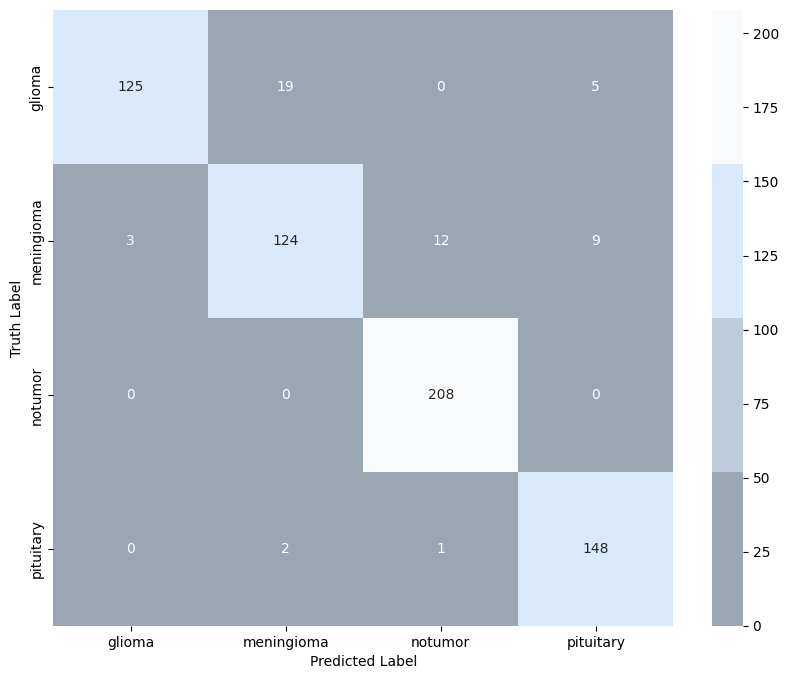

In [27]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

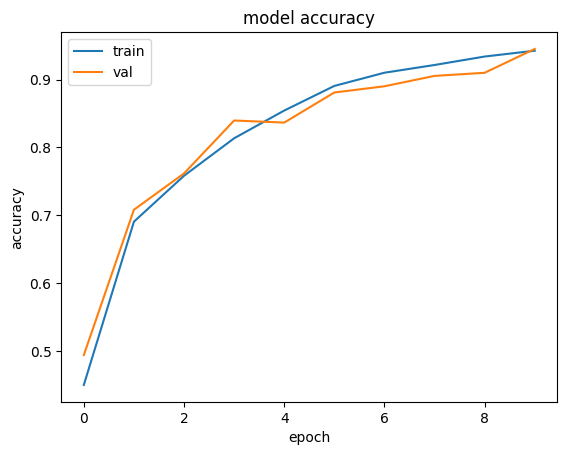

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

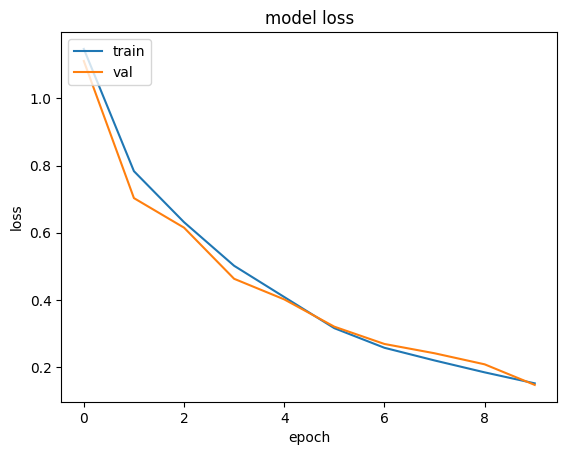

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

Visualize model performance

In [30]:
def predict(img_path):

    
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = Model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


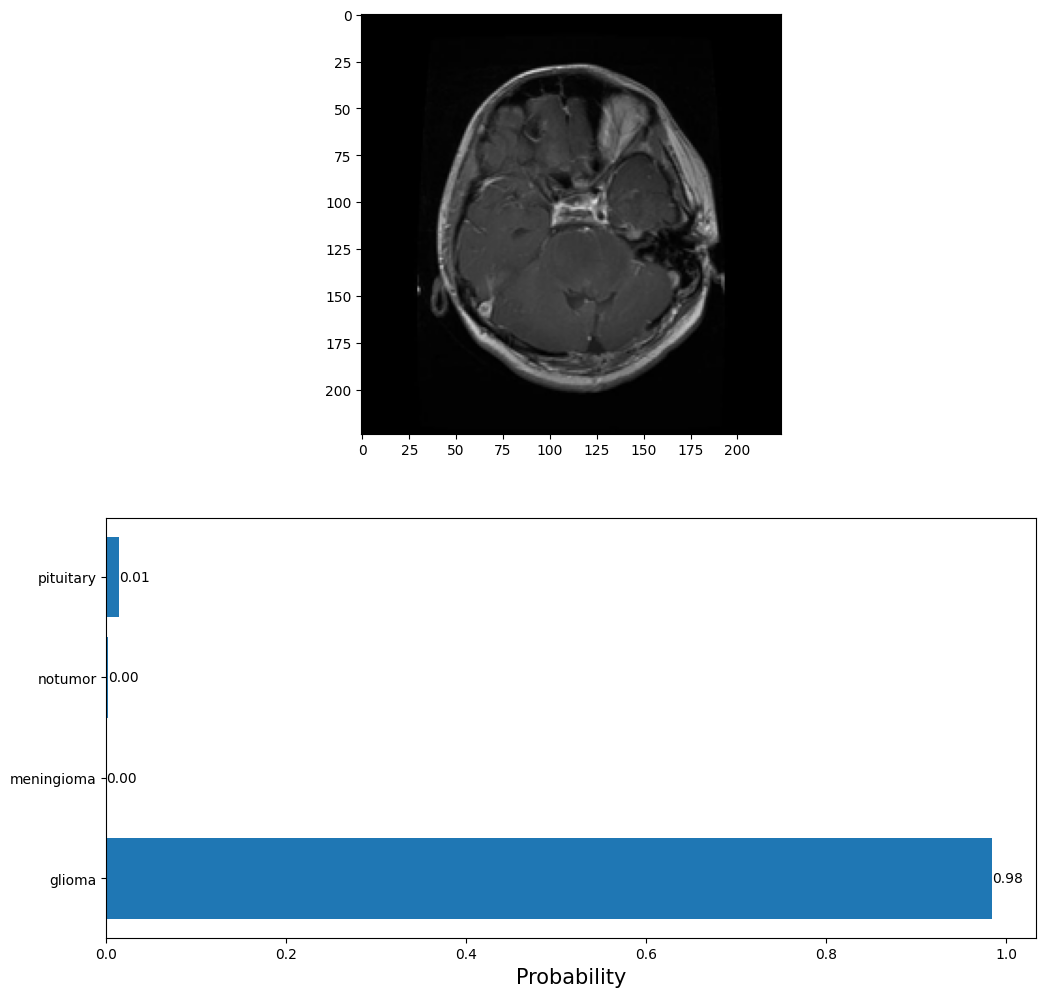

In [31]:
predict('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0010.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


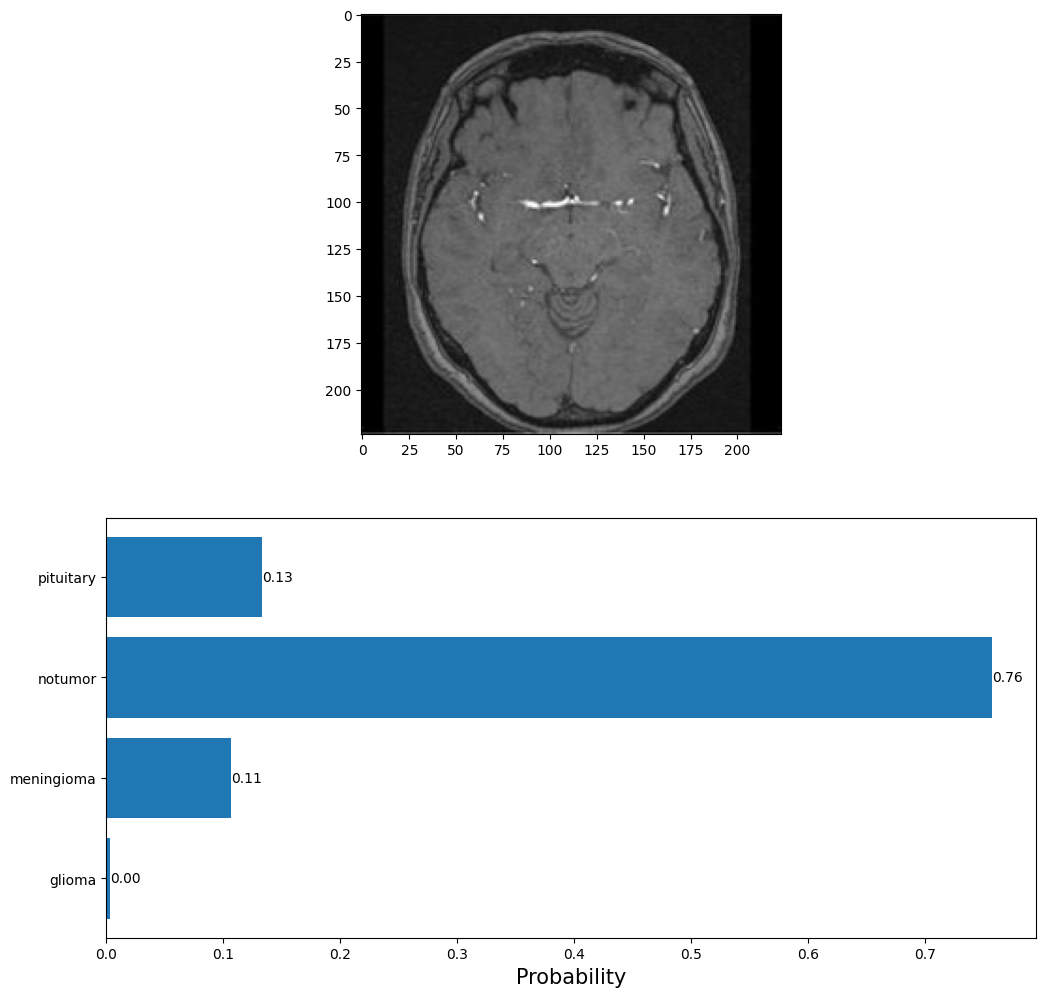

In [32]:
predict('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-no_0017.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


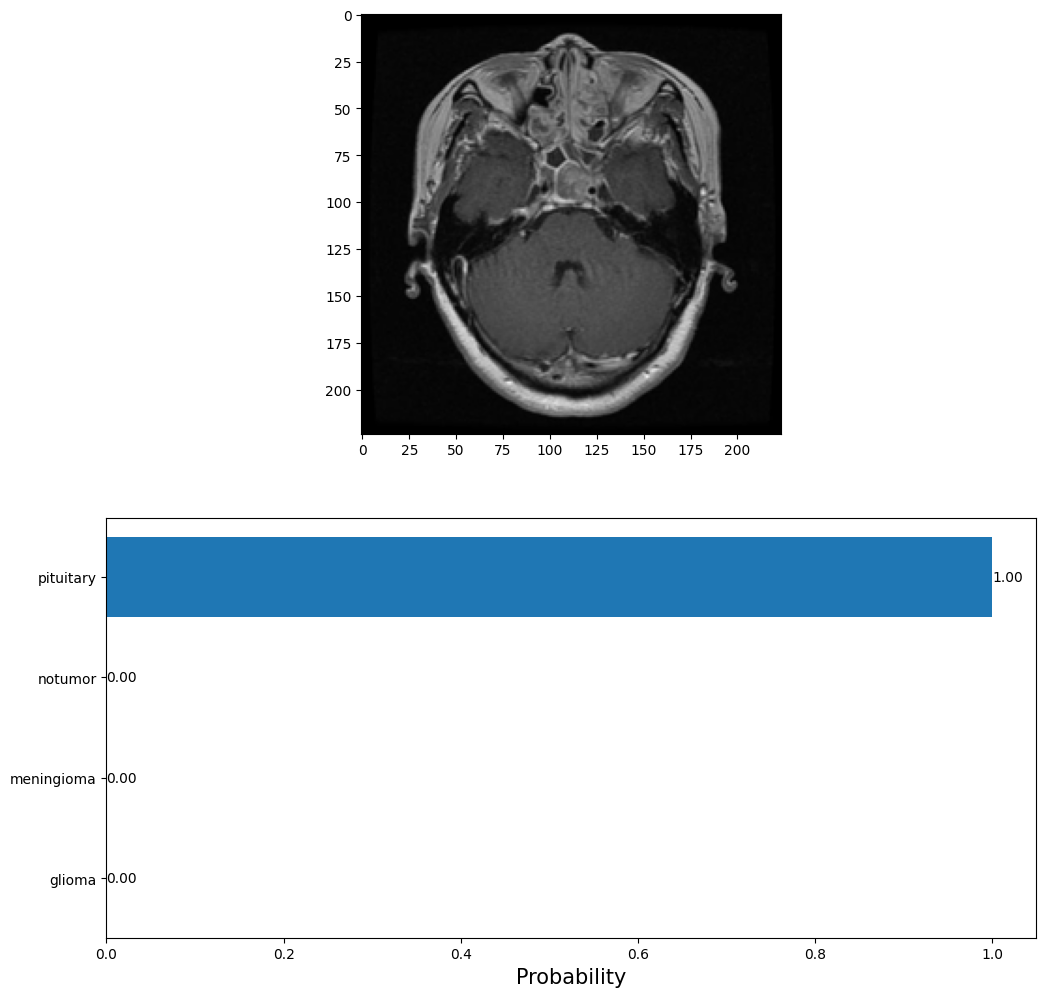

In [33]:
predict('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0059.jpg')

 # **NOTE** : --> It is clear that there is overfitting, so I will use a pretrained model.

A test of this initial model on photos out of Train Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


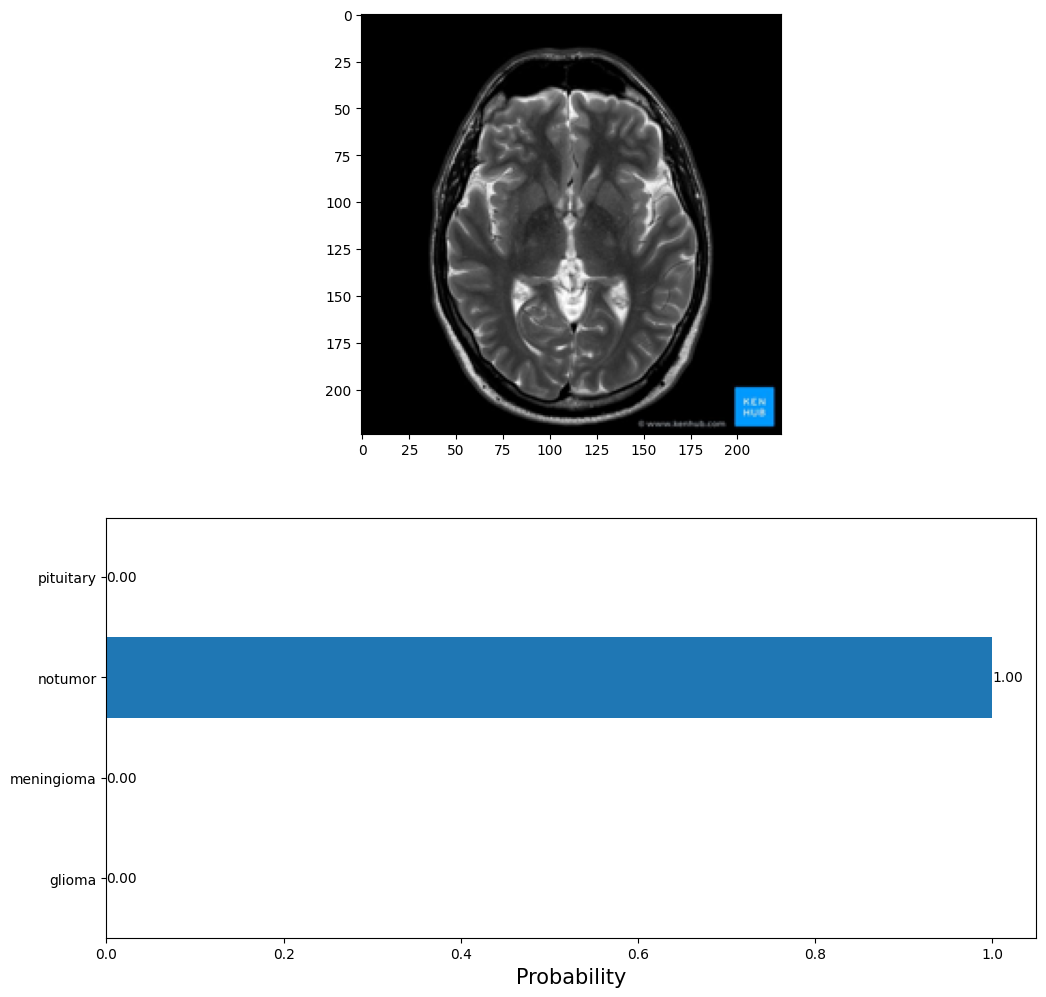

In [34]:
predict('/kaggle/input/brain-irm/A.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


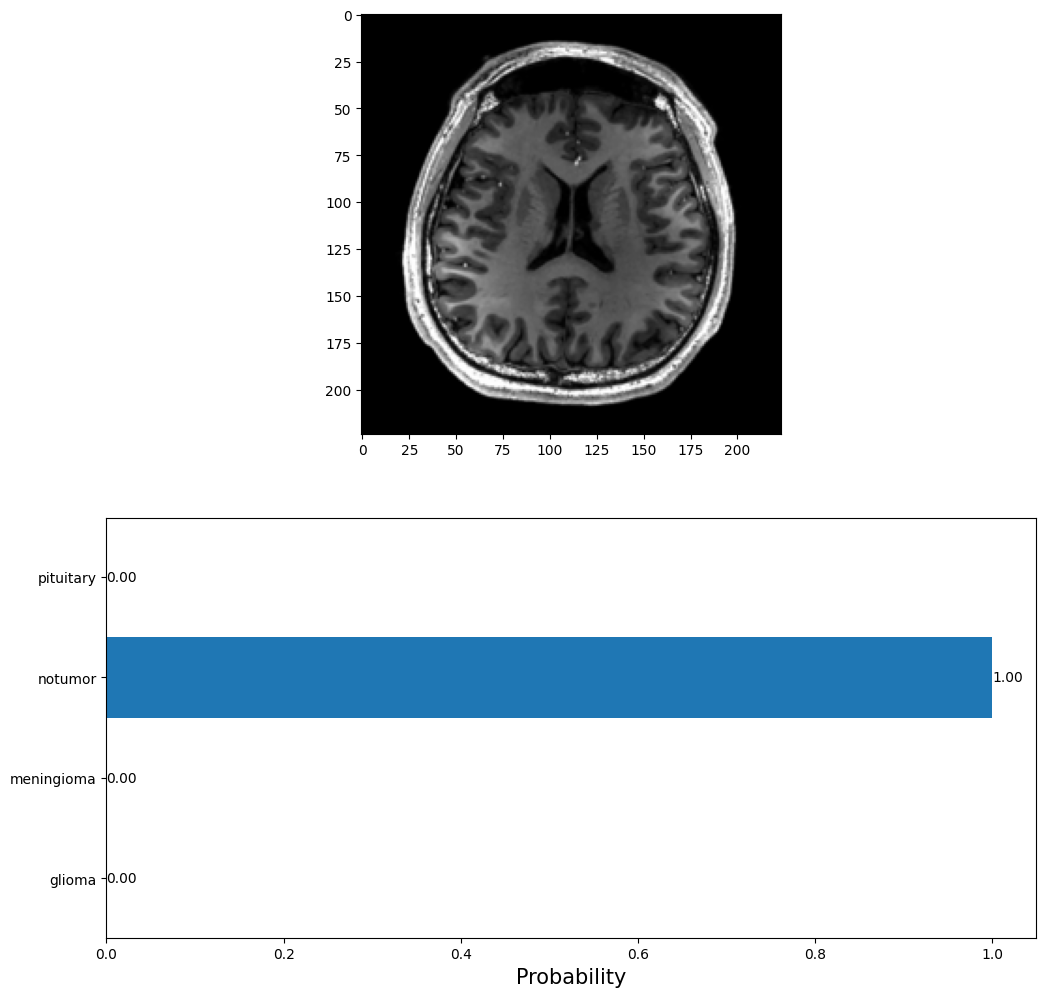

In [35]:
predict('/kaggle/input/brain-irm/B.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


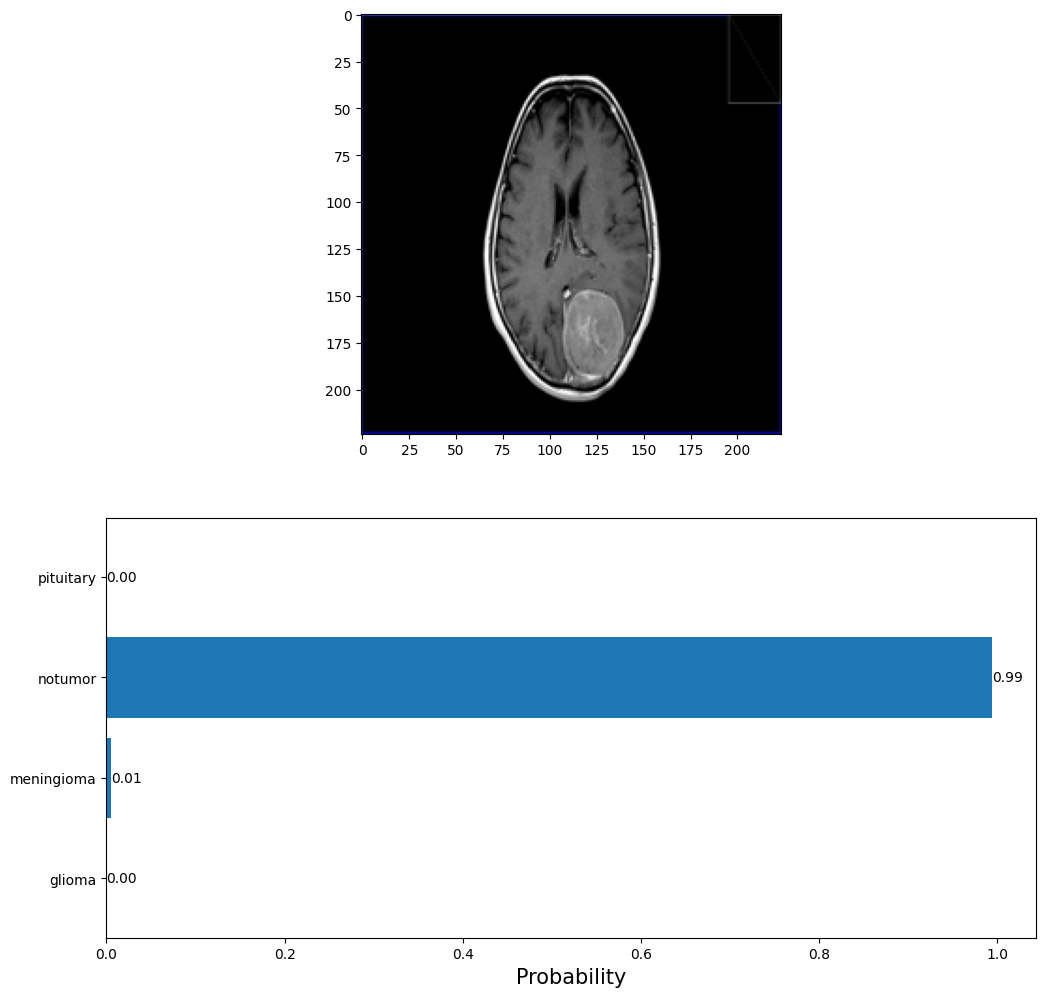

In [36]:
predict('/kaggle/input/brain-irm/C.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


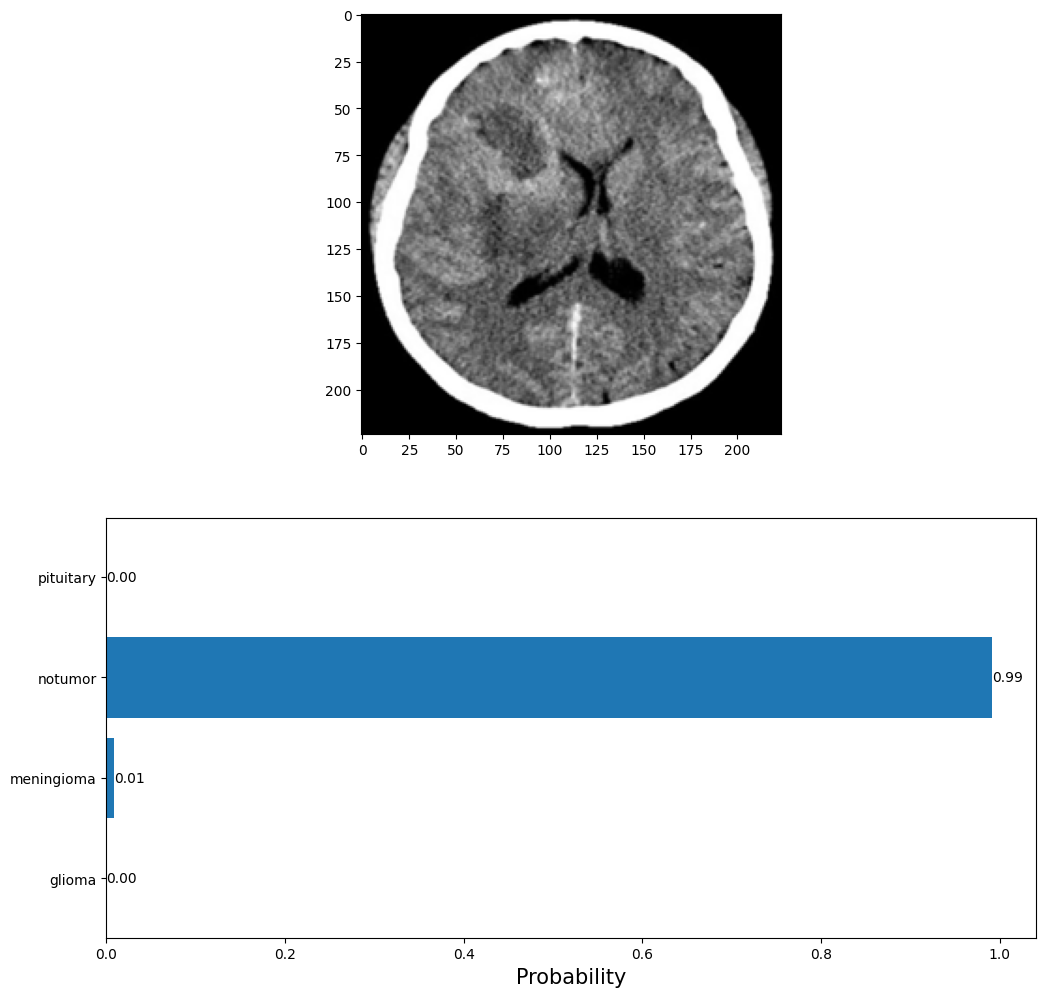

In [37]:
predict('/kaggle/input/brain-irm/E.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


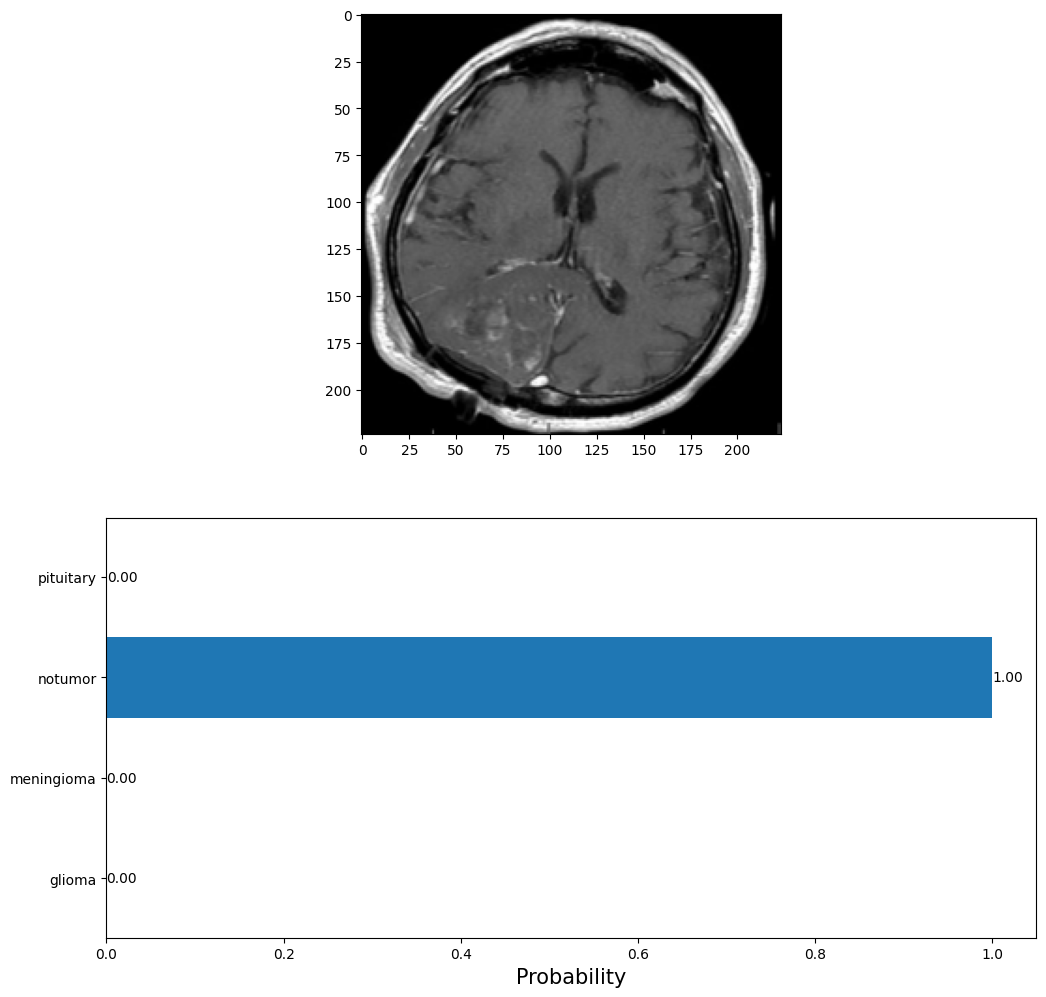

In [38]:
predict('/kaggle/input/brain-irm/F.png')

Pretrained Model from Keras

In [39]:
base_model = tf.keras.applications.EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=(img_size[0],img_size[1],3),
    pooling='max',
)

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
ModelPretrained = Sequential([
    base_model,
    
    Dense(256 , activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
    
])
ModelPretrained.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [41]:
history_Final = ModelPretrained.fit(
    gen_train, 
    epochs=5, 
    validation_data=gen_valid, 
    verbose=1, 
    
)


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 580ms/step - accuracy: 0.7564 - loss: 1.7372 - val_accuracy: 0.3038 - val_loss: 1.5462
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9549 - loss: 0.1278 - val_accuracy: 0.3008 - val_loss: 4.1779
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9738 - loss: 0.0729 - val_accuracy: 0.3282 - val_loss: 3.0302
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 228ms/step - accuracy: 0.9874 - loss: 0.0385 - val_accuracy: 0.8305 - val_loss: 0.5868
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 0.9914 - loss: 0.0314 - val_accuracy: 0.9786 - val_loss: 0.0850


# **Testing and Evaluation**


In [42]:
train_score = ModelPretrained.evaluate(gen_train, verbose=1)
valid_score = ModelPretrained.evaluate(gen_valid, verbose=1)
test_score = ModelPretrained.evaluate(gen_test, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.9937 - loss: 0.0250
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9755 - loss: 0.1125
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9822 - loss: 0.0453
Train Loss: 0.0223
Train Accuracy: 99.40%
--------------------
Validation Loss: 0.0850
Validation Accuracy: 97.86%
--------------------
Test Loss: 0.0428
Test Accuracy: 98.48%


In [43]:
ModelPretrained.save('Model Final Brain Tumor.h5')

# **Visualize model performance**

In [44]:
preds = ModelPretrained.predict(gen_test)
y_pred = np.argmax(preds, axis=1)


21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 433ms/step


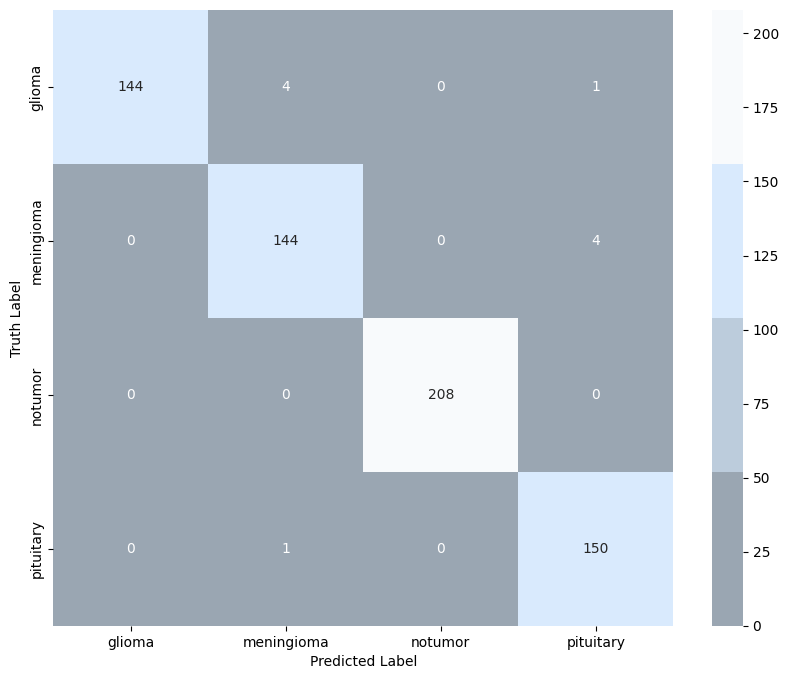

In [45]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

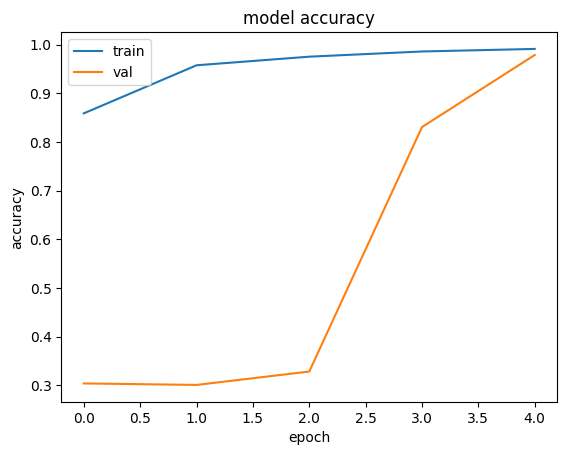

In [46]:
plt.plot(history_Final.history['accuracy'])
plt.plot(history_Final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

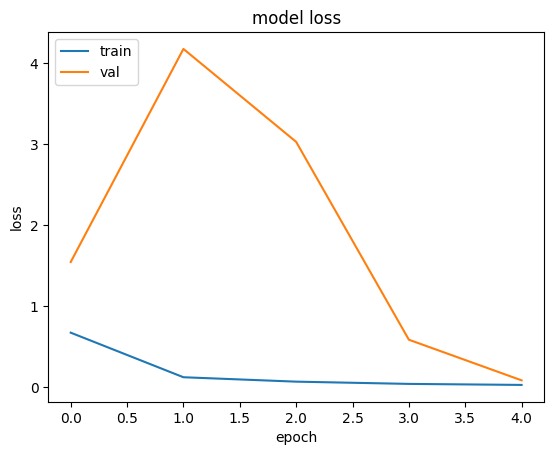

In [47]:
plt.plot(history_Final.history['loss'])
plt.plot(history_Final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [48]:
def predict(img_path):

    
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = ModelPretrained.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


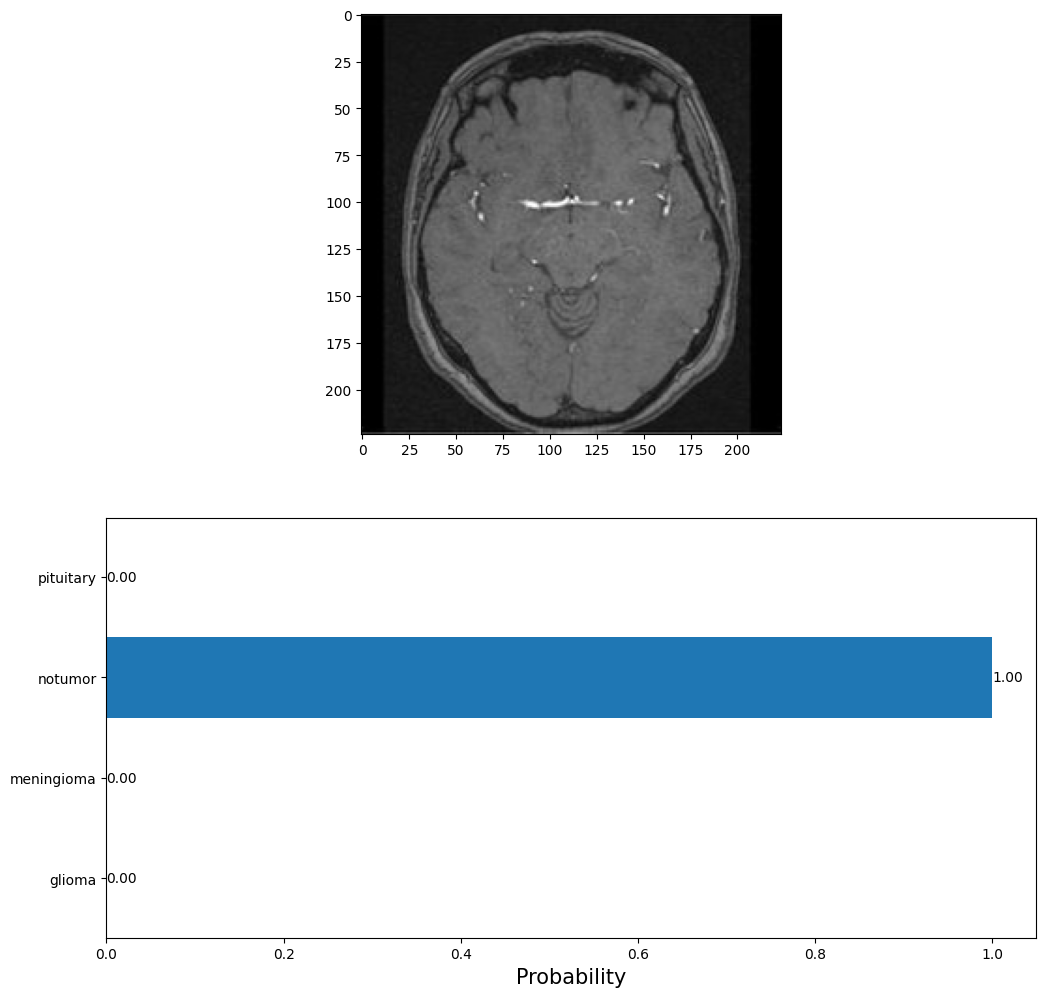

In [49]:
predict('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-no_0017.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


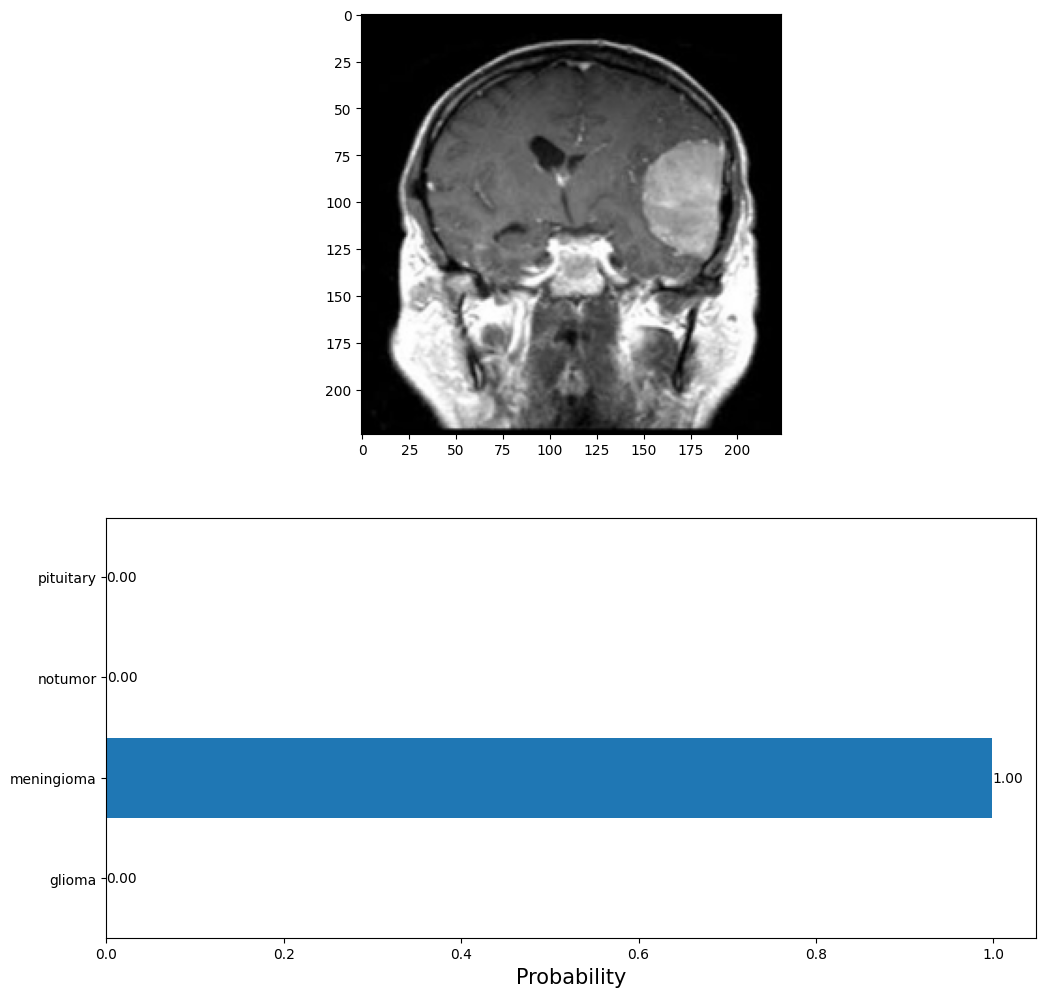

In [50]:
predict('/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0016.jpg')

Another test on photos out of Train Dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


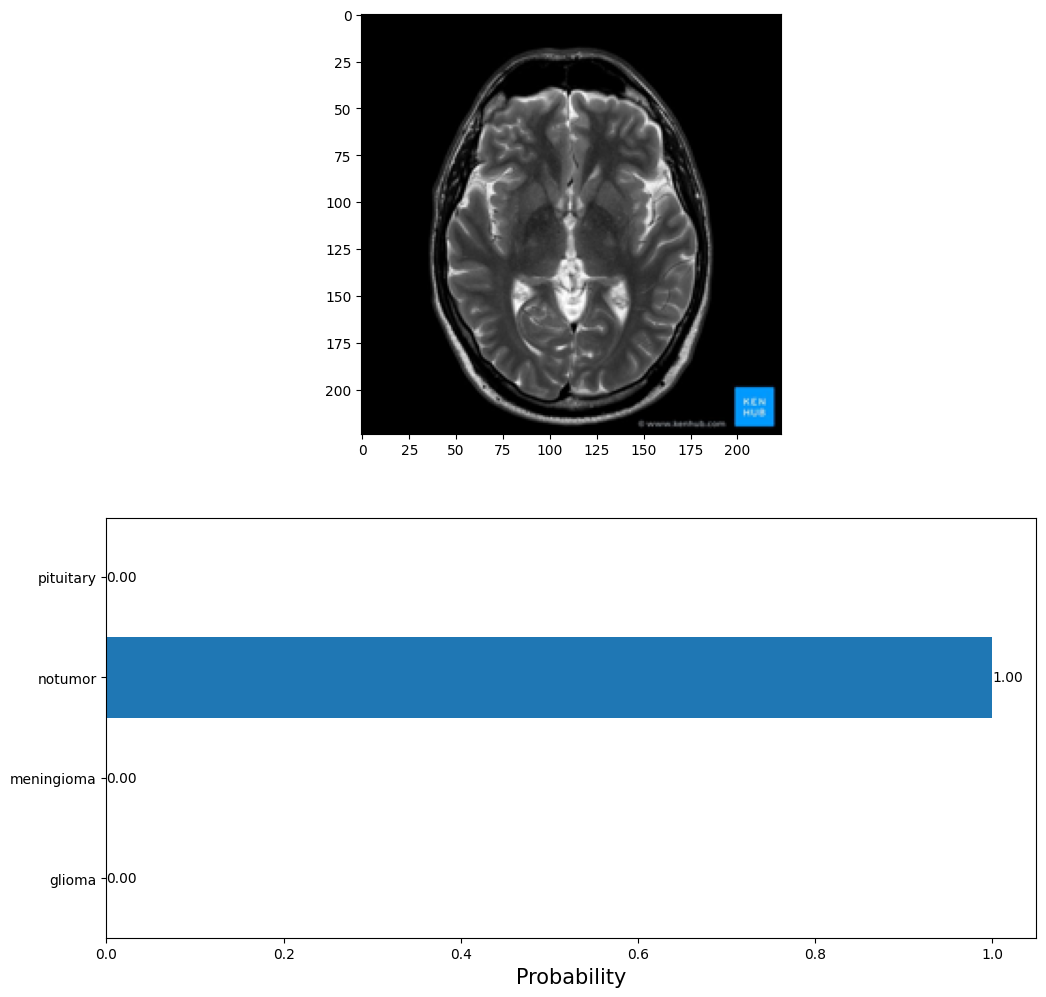

In [51]:
predict('/kaggle/input/brain-irm/A.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


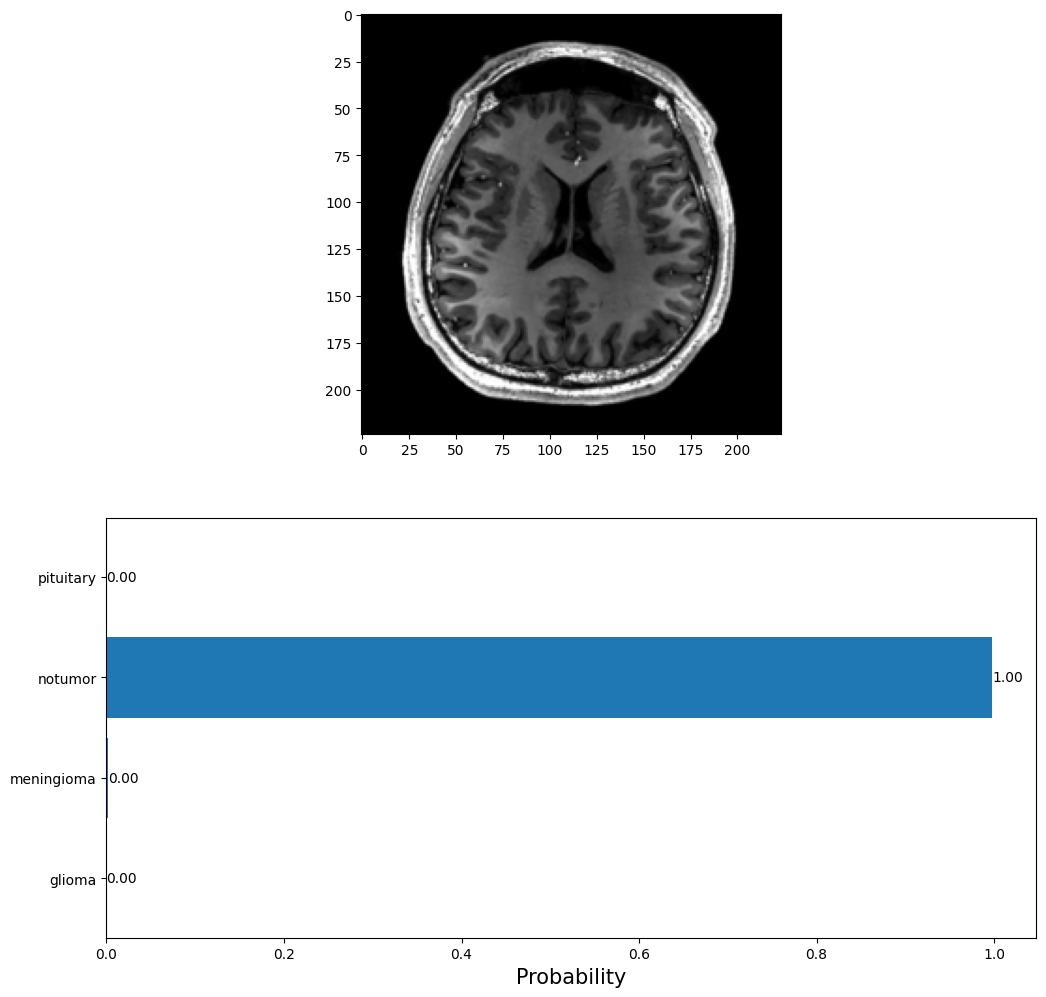

In [52]:
predict('/kaggle/input/brain-irm/B.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


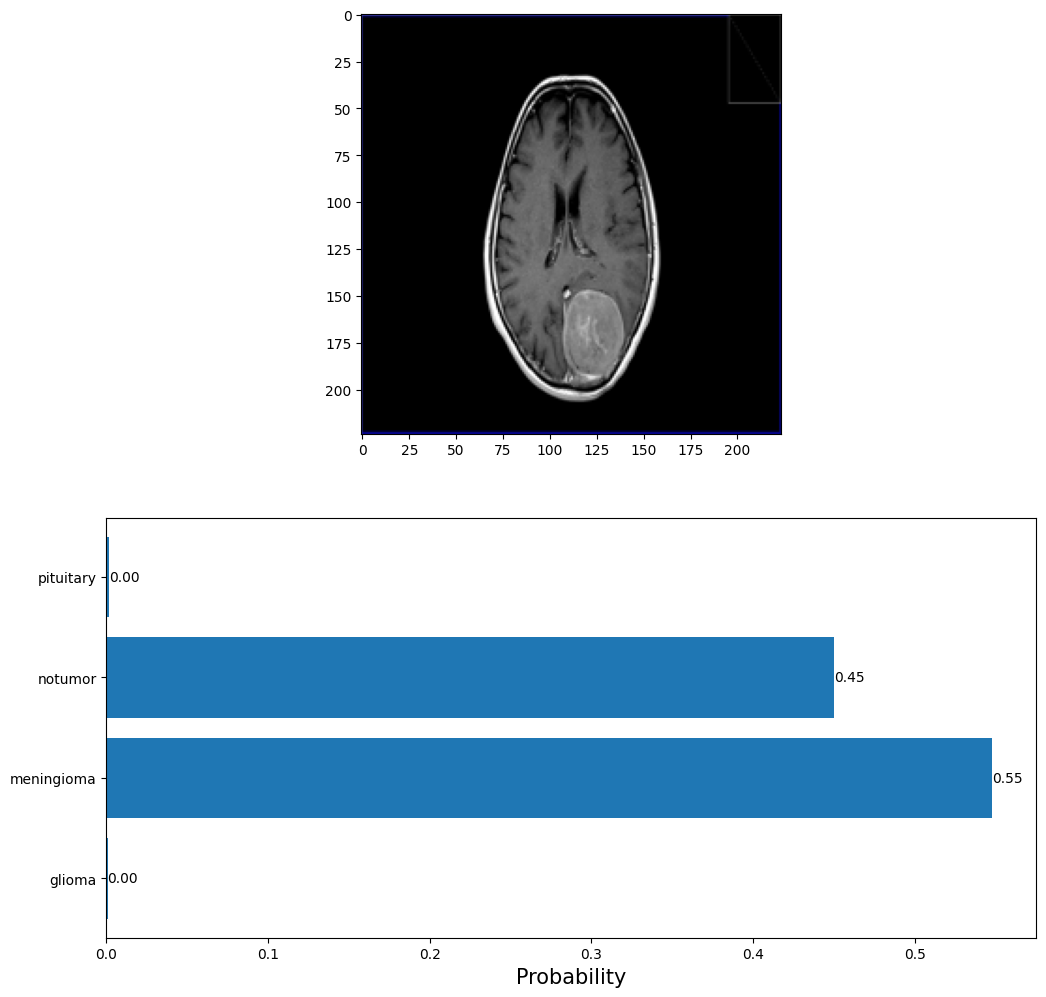

In [53]:
predict('/kaggle/input/brain-irm/C.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


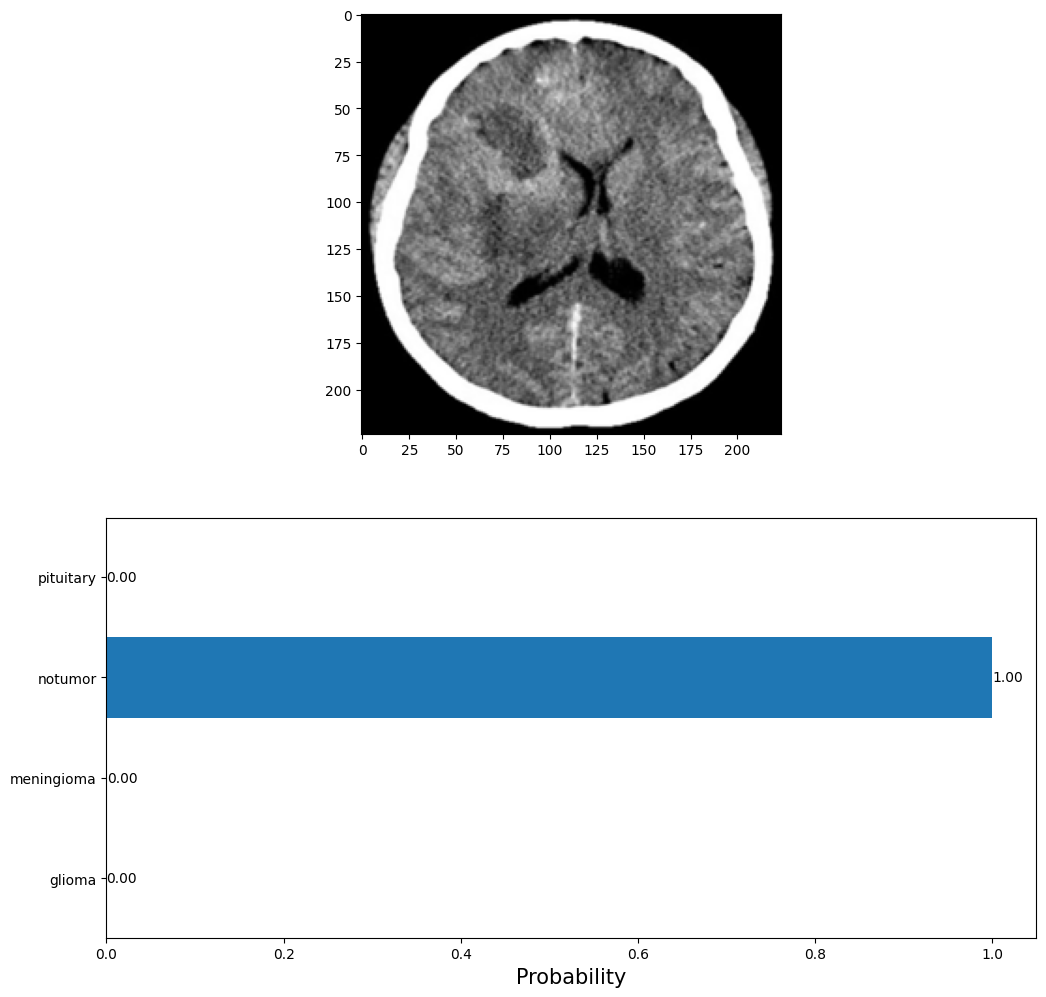

In [54]:
predict('/kaggle/input/brain-irm/E.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


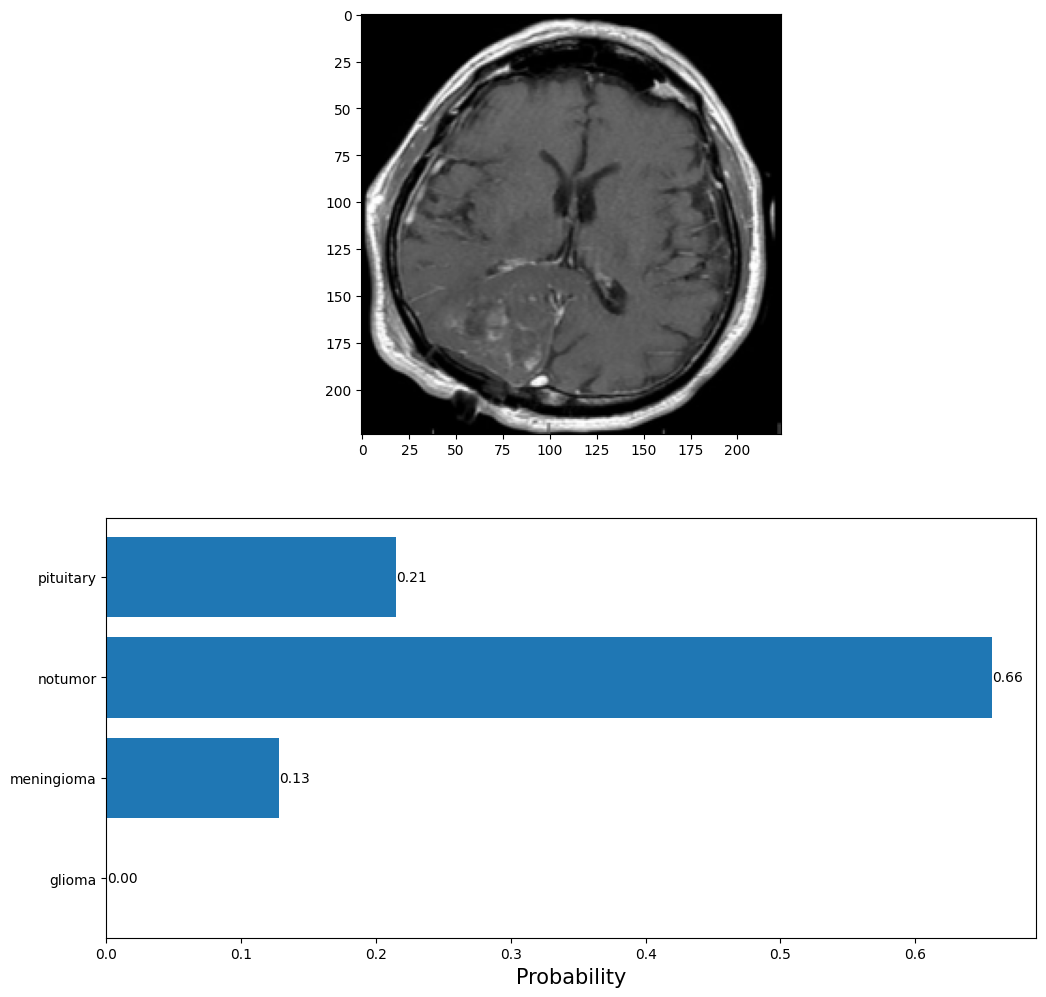

In [55]:
predict('/kaggle/input/brain-irm/F.png')

In [59]:
class_dict = gen_train.class_indices
print("Class indices:", class_dict)

Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [62]:
import pickle

In [63]:
# Define the save path
class_indices_path = "/kaggle/working/class_indices.pkl"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(class_indices_path), exist_ok=True)

# Save to pickle file
with open(class_indices_path, "wb") as f:
    pickle.dump(class_dict, f)

print(f"Class indices saved to {class_indices_path}")

Class indices saved to /kaggle/working/class_indices.pkl


In [64]:
ModelPretrained.save('ModelFinalBrainTumor.keras')